# GAN Task

Goal: the goal of tha task is to train a GAN using [fashion-mnist dataset](https://github.com/zalandoresearch/fashion-mnist) and use the GAN can generate photorealistic fashion image 

Experiment Summary: I first copy a existing code of DCGAN, which is originally applied on digit-mnist data. And then, i switch the dataset to fashion-mnist. In order to improve and enhance the performance of model, I fine tune the parameter of DCGAN in the following way:
1. use simgod as activation function of last layer of discrminator or not
2. change the learning rate of the optimizer
3. use Relu of LeakyRelu as activation function of each hidden layer of the generator
4. change the frequency of update discriminator for each update of discriminator
5. use the loss function from WGAN-GP or use the original one
6. use different normalization method for each hidden layer of discriminator

The result would be displayed and analysised in the following subsessions. Notice that due to the running time of trainning the GAN model, some experiments are stopped early.

### 1. DCGAN on digit mnist

The original code comes from [here](https://www.tensorflow.org/tutorials/generative/dcgan)

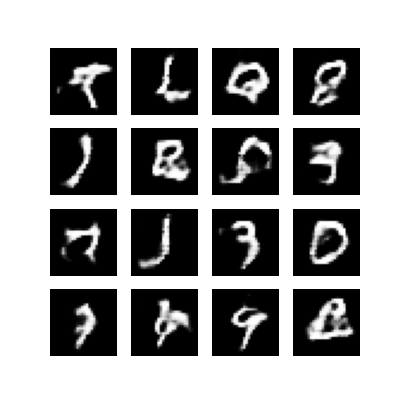

In [6]:
from IPython.display import Image
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_1/generator_res/image_at_epoch_0050.png') 

The hand-writen digit image generated from DCGAN, which is comparable with the result online. Code works correctly.

## 2. DCGAN on fashion-mnist

Simply change the dataset fron digit mnist to fashion mnist. 

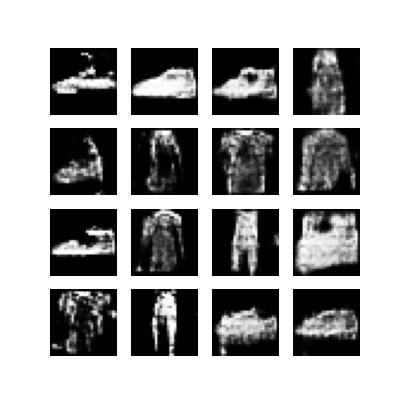

In [7]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_2/image_at_epoch_0049.png') 
# result from 50th epoch

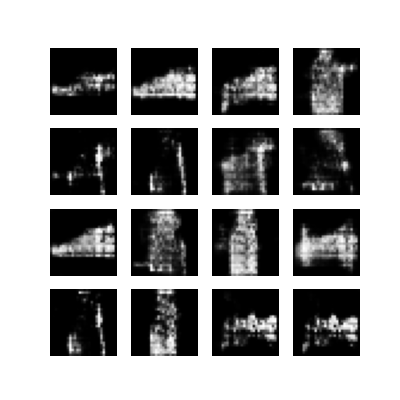

In [13]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_2/image_at_epoch_0025.png') 
# result from 26th epoch

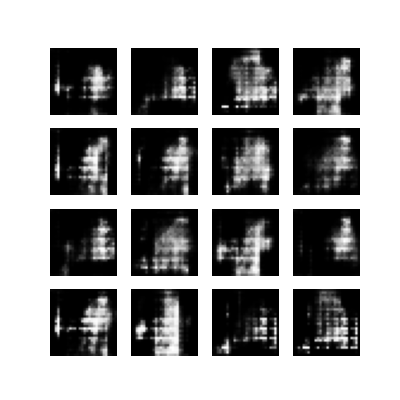

In [15]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_2/image_at_epoch_0015.png') 
# result from 16th epoch

Above shows results from 50 epoch, 26 epoch and 16 epoch. I would use those results as benchmark for the following experiments. 

##  3.  Change the learning rate from 1e-4 to 2e-4

Learn from some articles, the best learning rate of Adam Optimizer for GAN is 2e-4

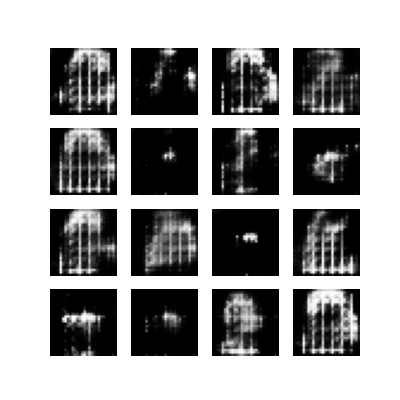

In [10]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_3/image_at_epoch_0012.png') 
# result from 13th epoch

The result is better comparing with the benchmark result of 16th epoch

## 4. Change the learning rate to 4e-4

See if increasing the learning rate would keep improving the performance.

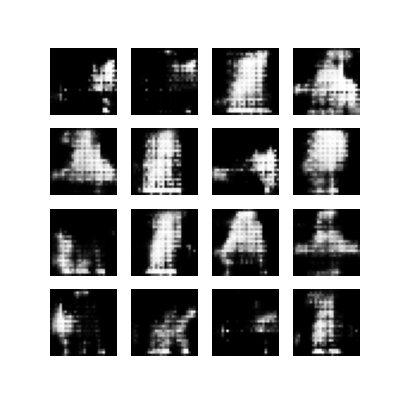

In [11]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_4/image_at_epoch_0012.png') 
# result from 13th epoch

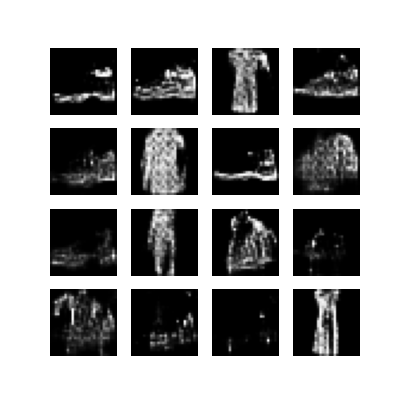

In [16]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_4/image_at_epoch_0050.png') 
# result from 51th epoch

For 16th epoch, the result is a little worse than task3 (learning rate 2e-4). For 51 epoch, the result is slightly worse than the benchmark (still OK). So i think 2e-4 is a ideal learning rate.

## 5. Add sigmod activation function to the last layer of discriminator

In the DCGAN descripted by the original paper, the last layer should come with sigmod activation function, but in the code i found, it didn't. So i added it back.

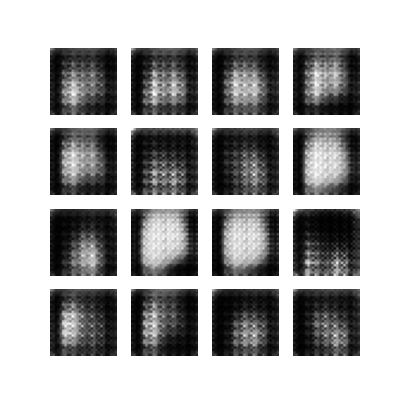

In [18]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_5/image_at_epoch_0000.png') 
# result from 1th epoch

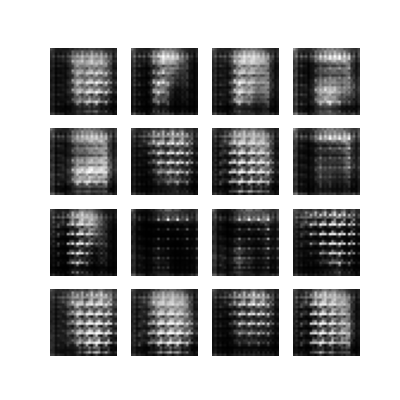

In [19]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_5/image_at_epoch_0009.png') 
# result from 9th epoch

GAN doesn't learn anything, so i stop the process.

## 6. Add batch normalizaton to each hidden layer of discriminator

In the DCGAN paper, each output of hidden layer is batch normalized. However, in the code, it didn't (perhaps not adding batch normalization would perform better on digit-mnist). Here, i add it back based on the parameter setting of task 5.

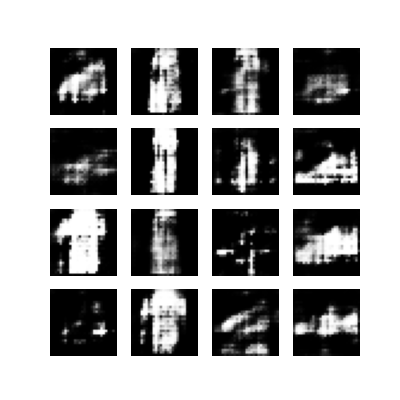

In [26]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_6/image_at_epoch_0009.png') 
# result from 10th epoch

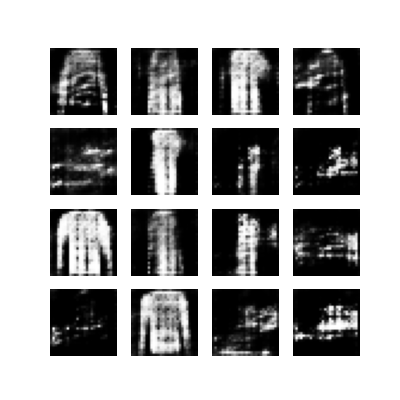

In [23]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_6/image_at_epoch_0015.png') 
# result from 16th epoch

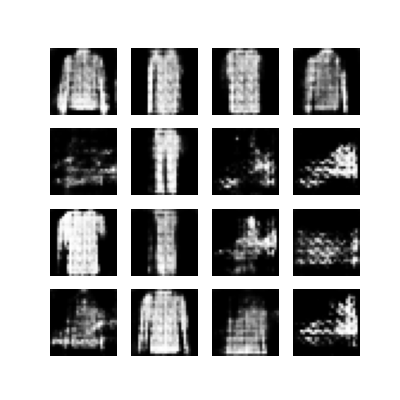

In [22]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_6/image_at_epoch_0021.png') 
# result from 22th epoch

The result looks better than the the result of 50th epoch in task4. The result of task6 should be the new benchmark, the later tasks can just train up to 20+ epochs, and see if the result is comparable.

## 7. Change the activation function of hidden layer of generator from LeakyRelu to Relu

The activation function of hidden layer in generator in the DCGAN paper is Relu, so i make the change from LeakyRelu to Relu.

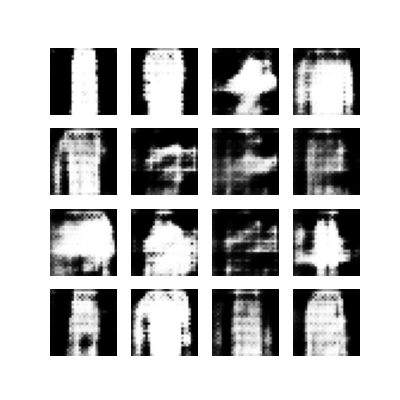

In [25]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_7/image_at_epoch_0015.png') 
# result from 16th epoch

I stop the trainning process at 16th epoch, cause the result is not comparable to the 16th epoch of task7. So i think using LeakyRelu in generator is better than using Relu

## 8. Based on the parameter setting of task6, change learning rate of Adam optimizer of generator to 4*1e-4

For each batch, i would monitor the loss of generator and discriminator as well as the average classification of real images and fake images from generator.

The average classfication of real image is 30% while the average classfication of fake image is 5%. Notice that the discriminator can easily classify images. The generator's learning process is slower than discriminator. Should find some methods to boost the performance of generator. Here i try to increase the learning rate of Adam optimizer just for generator.

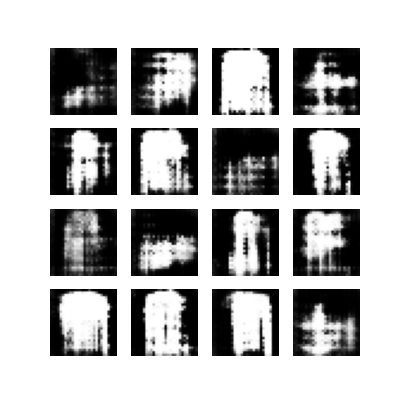

In [27]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_8/image_at_epoch_0009.png') 
# result from 10th epoch

Compare with task6, the result of epoch 10 doesn't improve too much. So increasing the learning rate doesn't help too much.

## 9. Based on parameter setting of task6, let generator updated four times for each discriminator update

I learn this idea from some articles, it sounds reasonable to update the slow learner more frequent than the fast learner

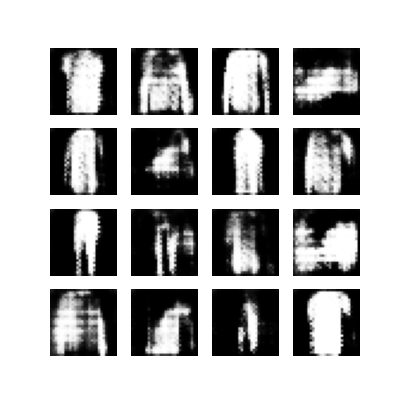

In [28]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/image_at_epoch_0009.png') 
# result from 10th epoch

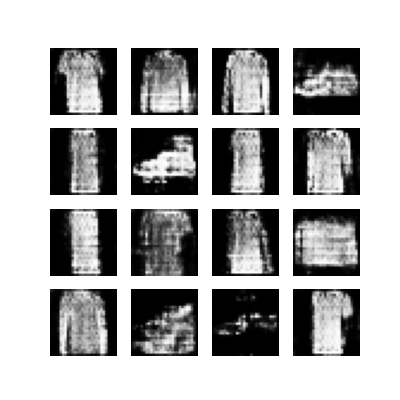

In [29]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/image_at_epoch_0021.png') 
# result from 22th epoch

The result looks much better than the one in task8. And the image form epoch 22 is even more 'real' than task6. So i think this is a right direction to improve the performance. :)

## 10. Add a gradient penalty to the loss function of discriminator

This idea comes from the WGAN-GP. I haven't look at the paper in details, and just find some existing code in GitHub. It looks easy to implement, just adding a gradient penalty to the discriminator's loss function. In those WGAN-GP projects online, the performace of WGAN-GP is always better han DCGAN. So, let's check.

In my code, i add the gradient penalty to the loss function of discriminator and also remove the sigmoid activation function of last layer of discriminator and remove batch normalization of hidden layer in discriminator.

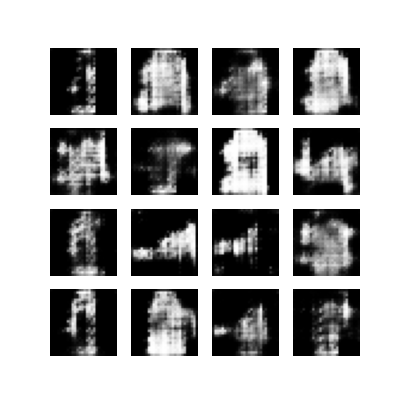

In [30]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_10/image_at_epoch_0014.png') 
# result from 15th epoch

Emmmm, the result looks OK, i think the result is slightly worse than the one in task9.

## 11. Based on parameter setting of task10, add layer normalization to the hidden layer of discriminator 

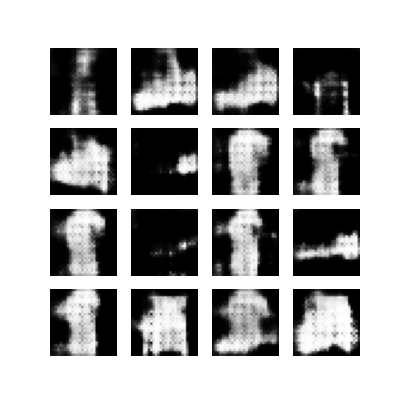

In [31]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_11/image_at_epoch_0014.png') 
# result from 15th epoch

The result is worse than task10. I think there may exist some mistakes in my implementation of WGAN-GP. Otherwise, it would outperform the DCGAN. 

## 12. Continue trainning based on the parameter setting of task9

Up to now, the base result i have is with the parameter setting of task8. So i could increase the update times of task8. See what's the final result looks like.

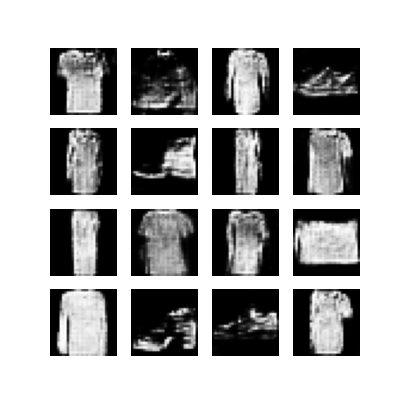

In [33]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/image_at_epoch_0040.png') 
# result from 41th epoch

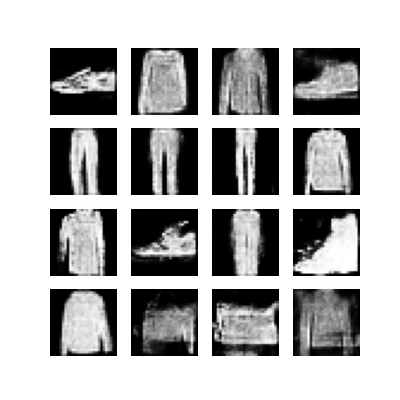

In [34]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/image_at_epoch_0060.png') 
# result from 61th epoch

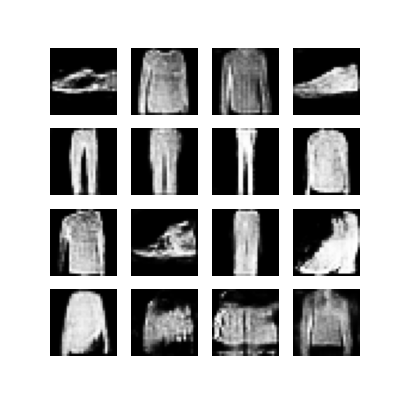

In [36]:
Image(filename='/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/image_at_epoch_0080.png') 
# result from 81th epoch

In [47]:
import pandas as pd
import os
import matplotlib.pyplot as plt
PATH = '/Users/wangj3475/Programing/processing/fashion_gan/result/MINIST/res_9/'
for i in range(80):
    temp = pd.read_csv(os.path.join(PATH, 'loss_db_{}.csv'.format(i)))
    if i == 0:
        loss_db = temp
    else:
        loss_db = loss_db.append(temp)

In [48]:
# value of loss fucntion, check its learning process
G_loss = loss_db['G_Loss'] 
D_loss = loss_db['D_Loss']
# average value of classification result of real image and fake image
# check how the discrminator performans
D_real = loss_db['D_real']
D_fake = loss_db['D_fake']
# save the wrong data for showing the learning process...
# will update soon once i rerun the task9

This is the best result i have currently. Comparing the result of epoch 40 with epoch 60, the generator definitely doing a btter job on generating a 'shoe' like image. But comapring the result of epoch 60 with epoch 40, the result doesn't change too much. 

It seems like the current issue is that GAN is trapped at a local optimization.

Future work:
1. Return back to WGAN-GP, check the code, and get the right WGAN-GP
2. Use other network structure for both discriminator and generator, like Resnet